# A Byte of Python and GNURADIO.
🎹 In this sheet, we will perform some experiments related to Music and audio.
We start by generating an audible 240Hz signal, and then hear some musical notes as well.

We have mentioned earlier that *gnuradio* is very useful in visualizing signal processing algorithms, as well as quick prototyping. Its capabilities also include a seamless assimilation of many python commands, and this can be very very handy. 

Okay, first things first, let us get gnuradio. 

---
In ubuntu, typing on a termial **sudo apt install gnuradio** 
will do the trick for you. If you wish to have a more specific version then follow <br>
sudo add-apt-repository ppa:gnuradio/gnuradio-releases-3.9 <br>
sudo apt-get update <br>
sudo apt-get install gnuradio python3-packaging <br>

You can also download it and install it from gnuradio.org, and can access the sourcecode as well. Installations for windows and Mac are also available there, but I have never tried the latter.


## Vector Source

Signals are stored as arrays in python (or other programming languages). For example, consider representing the analog signal $x(t) = \frac 12 t$ for $t\geq 0$. Of course storing each value of this function as such is impossible. We can be reasonable and represent the values in the interval $0\leq t \leq 10$, but even that is not easy to store value by value. So our array wil contain several representative values of the signal. The following python program illustrates this, using numpy library utilities to plot $100$ representative values.

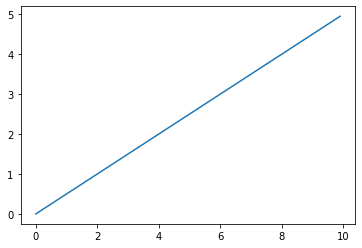

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

arr1 = np.arange(0,10,0.1);         # here the two arrays arr1 and arr2 are the same except for the last element.
arr2 = np.linspace(0,10,101);       # we used two different commands to illustrate the similarities.
                                    # np.linspace divides the interval, say [0,10], to 101 pieces. 
plt.plot(arr1,0.5*arr2[:100])       # first 100 values of arr1 and arr2 are the same

Any of the arrays arr1 or arr2 can be used as a vector source in gnuradio. Let us generate a gnuradio flowgraph now.

1. Double-click/(type-in-terminal) gnuradio-companion to open a 'flowgraph' canvas displaying a GUI cockpit.    
2. File -> New -> Qt-GUI  
3. Ctrl+F and search for the word `vector', then drag *Vector-Source* to the left of the canvas.
4. Search for `Time' and drag *QT-Gui-Time-Sink* to canvas. Connect source and sink by successively clicking the protruding buttons (blue colored in the image below) of the two blocks.

The picture will look like the following.

---
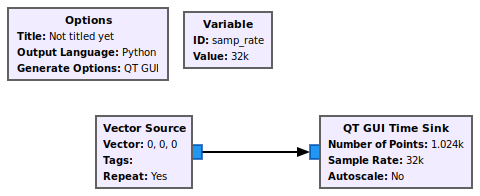

---

#Making an Audio Tone
Let us convert our vector source to an audio source which produces a 240 Hz sinusoid that can be played on the computer. We will use an audio rate of 48kHz, i.e. the audio card collects 48000 samples every second, and places it to the speaker (built-in or earphones) in such a way that we can hear a continous tone.



1. Look at the variable samp_rate (on top of above image). Double-click and change the value in the pop-up to 48000, and press OK.

2. Now double-click the Vector Source and replace $(0,0,0)$ there by $[1,2,3]$, just for a test.  Your changes will reflect in the flowgraph.

3. Before we proceed, notice that  many blocks in gnuradio default to complex type. Since audio is real, we have to change the source and sink types to floating point. This can be done by double-clicking and then updating the pop-up. Change type to FLOAT and the earlier blue buttons in the flowgraph now change to orange color, as shown below. You can proceed by clicking the Execute or Play button on top panel (or choose Run, or press F5 button). Windows may prompt you to save, please save in a writable directory, say Desktop, Documents etc with an indentifiable filename, but avoid saving as audio.grc, vector.grc, source.grc etc. Prefix the filename with your initials, say ABC_audio1.grc, it is better.



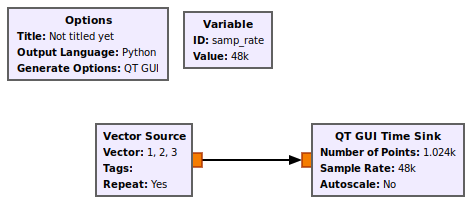

The vector source accommodates any Python 1D array, and that is great. Plus, the Repeat option allows it to stream the values of the vector repeatedly. For example, if we form an array representing one cycle of a sine-wave, the Vector Source can generate a periodic output cycling through the contents, i.e. a sinusoid from some starting instant. We will use numpy libraries to do this. 


1. Ctrl+F, search and drag an import block. Double-click and write *import numpy as np* in the field given. You can access numpy as np now.
2. Drag a new variable block, change the ID to Inp_Vec, or any such name. Make the variable as $np.sin(2*np.pi*(240/48000)*np.arange(0,200))$
3. Change the Vector in Vector-Source to Inp_Vec.
4. Drag and connect an Audio Sink as well to the Vector Source, choose the rate of audio sink as 48kHz.

The image will look like the one below now. Note that if there is a red line/word highlighted anywhere in the flowgraph, that implies an error, and needs to be recitified.


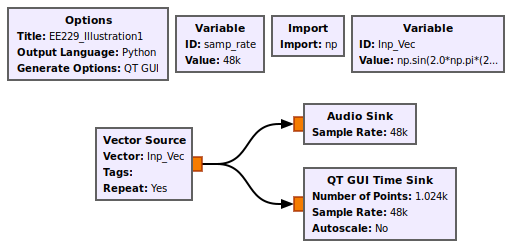

Run the flowgraph and you can hear the 240Hz tone. At times you may have to choose the non-default audio hardware, you can find help on the web, or mail me the error-log. Play with Time Sink options to see the waveform, look at the $x,y$ coordinates etc to familiarize. Actually hearing the audio can be done here in Colab itself. Run the code below and you can play it. The difference is that instead of $200$ samples as above, we have taken 96000 samples, i.e. 2 seconds of data, which will account for 480 cycles of the sine wave.

In [ ]:
from IPython.display import Audio, display
import soundfile as sf
import numpy as np

myarr = np.sin(2.0*np.pi*(240/48000)*np.arange(0,96000))
sf.write('my_sound.wav', myarr, 48000)

display(Audio('my_sound.wav', autoplay=True))

# SaReGaMaPaDhaNiSa

Now that we have learnt about creating audible tones, let us put it together to play the *Saptaswara* or the seven basic notes (Do, Re, Mi, Fa, Sol, La, Si, Do) in the western music system. Each note correspond to a fixed frequency, and vocalists (as well as instruments) are tuned to this. We first define an array containing the 7 notes, and then generate a sinusoid of duration $1$ second for each note. Notice that $1$ second will correspond to $48000$ samples in the audio card. Okay, here we go.

In [ ]:
import numpy as np; import matplotlib.pyplot as plt;
from IPython.display import Audio, display
NoteI = [256, 280, 312, 346, 382, 426, 480]; # Indian Notes 
NoteW = [220, 246.94, 261.63, 293.66, 329.63, 349.23, 392]  # Western Notes, Do is 261.63Hz.
fs = 48000;  # sampling rate

# Below command creates an array to play for 7 seconds, each second a different Basic tone.
aud_out=np.cos(((((np.ones((7,1))*np.arange(0,48000)).T*NoteI).T).flatten())*2.0*np.pi/fs); 
sf.write('my_sound.wav', aud_out, 48000)

display(Audio('my_sound.wav', autoplay=True))

#Homework-3.1:#
 Convert the above audio containing the basic notes to a wave file and play it in Colab. You can cut+paste the code from the cell playing 240Hz audio above. Change the code to play the Western Notes, and check for any audible deformities. You don't need to email any answer to this.

#Notes on GNURADIO
  Though we are making notes for GNURADIO all this while, let us now put the NOTEs that we generated on GNURADIO, and play from there. After the initial import of numpy, and setting samp_rate to 48k:

1.   First, create a variable (i.e. drag after Ctrl+F search) with the ID NoteI. Choose the values $[256, 280, 312, 346, 382, 426, 480]$ for it.
2. Now, create another variable with ID Wav_Inp $np.cos((2.0*np.pi/48e3)*((np.ones((7,1))*np.arange(0,48000)).T*NoteI).T.flatten())$, which has the same contents as the array aud_out in the last code cell above.  
3. Create Vector Source with the vector set as Wav_Inp, and connect the output to Audio Sink (recall that we need floating points every where).

The flowgraph will look like the one below, and you can execute after saving.


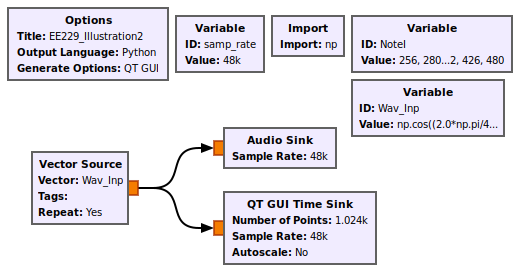

# Some Final Comments
Some of you might still be confused how we were able to pack all that SaReGaMa into such a simple flowgraph, yet it played out okay. Once the base notes were defined we just needed one python line to generate the whole array, and that is the beauty of using Python along with gnuradio (some aspects of the latter we are yet to appreciate).

Just to demystify, the main line is broken down to invididual parts below.

In [ ]:
A = np.ones((7,1))*np.arange(0,48000) #matrix with identical rows, each counting 0 to 47999
print(A)

[[0.0000e+00 1.0000e+00 2.0000e+00 ... 4.7997e+04 4.7998e+04 4.7999e+04]
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 4.7997e+04 4.7998e+04 4.7999e+04]
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 4.7997e+04 4.7998e+04 4.7999e+04]
 ...
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 4.7997e+04 4.7998e+04 4.7999e+04]
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 4.7997e+04 4.7998e+04 4.7999e+04]
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 4.7997e+04 4.7998e+04 4.7999e+04]]


In [ ]:
B = (A.T*NoteI).T  #each row is multiplied by a different note from NoteI array
print(B)

[[0.0000000e+00 2.5600000e+02 5.1200000e+02 ... 1.2287232e+07
  1.2287488e+07 1.2287744e+07]
 [0.0000000e+00 2.8000000e+02 5.6000000e+02 ... 1.3439160e+07
  1.3439440e+07 1.3439720e+07]
 [0.0000000e+00 3.1200000e+02 6.2400000e+02 ... 1.4975064e+07
  1.4975376e+07 1.4975688e+07]
 ...
 [0.0000000e+00 3.8200000e+02 7.6400000e+02 ... 1.8334854e+07
  1.8335236e+07 1.8335618e+07]
 [0.0000000e+00 4.2600000e+02 8.5200000e+02 ... 2.0446722e+07
  2.0447148e+07 2.0447574e+07]
 [0.0000000e+00 4.8000000e+02 9.6000000e+02 ... 2.3038560e+07
  2.3039040e+07 2.3039520e+07]]


In [ ]:
C = B.flatten() # convert to 1D array along the rows, each row can play its note for 1 second.
print(C)

[0.000000e+00 2.560000e+02 5.120000e+02 ... 2.303856e+07 2.303904e+07
 2.303952e+07]


In [ ]:
D = np.cos((2*np.pi/48000)*C)  # Take the phases and convert to a cosines of appropriate `frequencies', along the array
print(D)

[1.         0.99943858 0.99775496 ... 0.98228725 0.9921147  0.99802673]


There are several other ways of generating the array above. The one here may not be the most efficient, but it explains what we did in the class. The technique of generating different frequency notes for different values is actually called **frequency modulation**. In the analog domain, this is usually achieved by using *Voltage Controlled Oscillators* or VCOs. Given an input $v(t), t\geq 0$ to a VCO, the output $y(t)$ is
$$
\cos\Big(\alpha \int_0^t v(\tau) d\tau  \Big),
$$
where $\alpha$ is called the sensitivity of the VCO. One quick way to understand the VCO is to provide a constant voltage $V_1$ at time $t=t_1$, for a further duration of $T$ seconds. Let the phase of $y(t_1)$ be $\theta_0$. The output to the constant voltage after $t=t_1$ becomes
$$
y(t) = \cos(\theta_0 + \alpha (t-t_1)) = \cos(\hat \theta_0 + \alpha V_1 t),
$$
which except for the initial phase is a cosine waveform of frequeny $\frac\alpha{2\pi}V_1$. If we choose $\alpha=2\pi$, then the voltage $V_1$ makes the output frequency also $V_1$Hz, hence the name VCO. Btw, GNURADIO has a digital VCO, which generates the samples of the output $y(t)$ above. So the SaReGaMaPaDhaNi can be generated by the following flowgraph as well. You should think about why we have used a repeat block, and the value used there, this holds each output of the vector source to remain the same for the next 48000 samples.

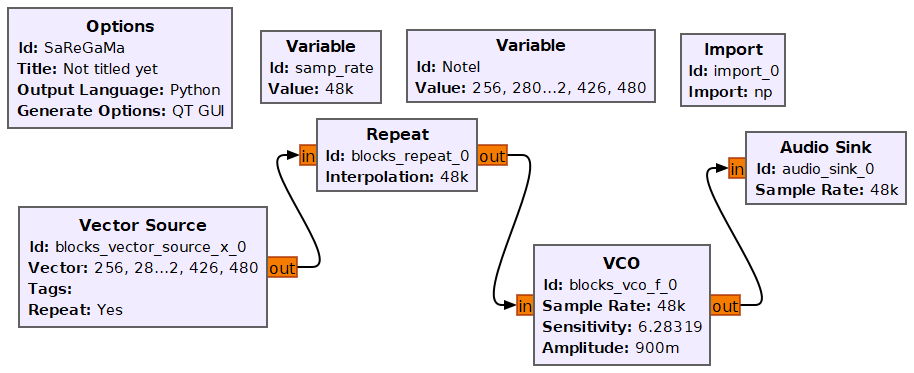

That is all for this gnuradio starter. An aspect which typical introductions emphasize, but ignored here,  is the use of a throttle block in gnuradio flowgraphs. This is not necessary when we have a hardware block in use, eg. audio sink. In flowgraphs without hardware, the use of throttle is useful for a smooth run of gnuradio. That being said, most modern systems can still handle the basic experiments without the use of any throttle block, this was not the case several years back. Bye..😃 